In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LinearRegression
from collections import Counter

## Useful functions to be used throughout the code

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [3]:
def read_csv(file_name):
    df = pd.read_csv(f"Artista_data/{file_name}.csv", index_col=0)
    return df

In [4]:
def get_correlation_matrix_by_album(df):
    df = df.sort_values(by='release_date', ascending=True)
    albums = df['album'].unique()    
    dfs = []
    for album in albums:
        dfs.append(df[df['album'] == album])

    #albums = [re.sub("[\(\[].*?[\)\]]", "", a) for a in albums]    
    return combine_correlation_matrices(dfs, albums)

In [5]:
def combine_correlation_matrices(dfs, columns):
    corrs = None
    for df in dfs:
        corr_df = get_correlation_matrix(df)
        if corrs is None:
            corrs = corr_df
        else:
            corrs = pd.concat([corrs, corr_df], axis=1)
    corrs.columns = columns
    return corrs

In [6]:
def get_correlation_matrix(df):
    #filter df to only use qunatitative columns
    df = df[['track_number', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms']]
    corr_df = df.corr()[['popularity']]
    corr_df.index = ['Track number', 'Acousticness', 'Danceability', 'Energy', 'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness', 'Tempo', 'Valence', 'Popularity', 'Duration (ms)']
    return corr_df[~corr_df.index.isin(['Popularity'])]

In [7]:
def print_correlation_heatmap(df):
    sns.heatmap(df, vmin=-1, vmax=1, cmap='coolwarm')
    plt.show()

In [8]:
def linear_regression_from_artist_df(df):
    features = df[['track_number', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
       'duration_ms']]
    target = df[[ 'popularity']]
    return LinearRegression(fit_intercept=False).fit(features, target), features, target

## Carrega dados

In [9]:
taylor_swift_df = read_csv('taylor_swift_spotify')
ed_sheeran_df = read_csv('ed_sheeran_spotify')
beatles_df = read_csv('beatles_spotify')
elton_john_df = read_csv('elton_john_spotify')
metallica_df = read_csv('metallica_spotify')
rolling_stones_df = read_csv('rolling_stones_spotify')
tame_impala_df = read_csv('tame_impala_spotify')

In [10]:
combined_df = pd.concat([taylor_swift_df, ed_sheeran_df, beatles_df, elton_john_df, metallica_df, rolling_stones_df, tame_impala_df])
combined_df = combined_df.reset_index()
combined_df.drop('index', axis=1, inplace=True)

## Heatmap de correlação das métricas e popularidade da música

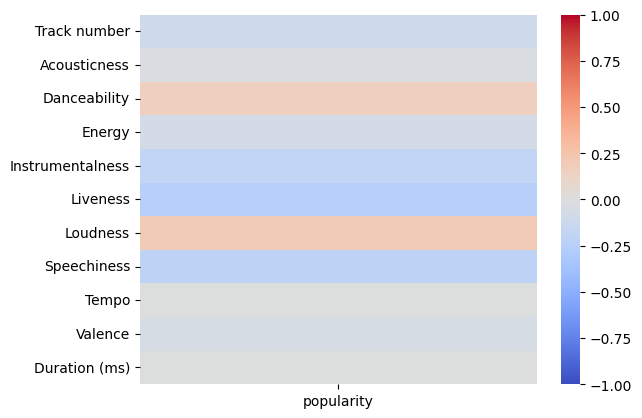

In [11]:
print_correlation_heatmap(get_correlation_matrix(combined_df))

In [11]:
get_correlation_matrix(combined_df)

,popularity
Track number,-0.102332
Acousticness,-0.030678
Danceability,0.162156
Energy,-0.071712
Instrumentalness,-0.186226
Liveness,-0.252177
Loudness,0.199178
Speechiness,-0.213828
Tempo,-0.002854
Valence,-0.048372


In [12]:
artists = ["Beatles", "Rolling Stones", "Elton John", "Metallica", "Taylor Swift", "Tame Impala", "Ed Sheeran"]

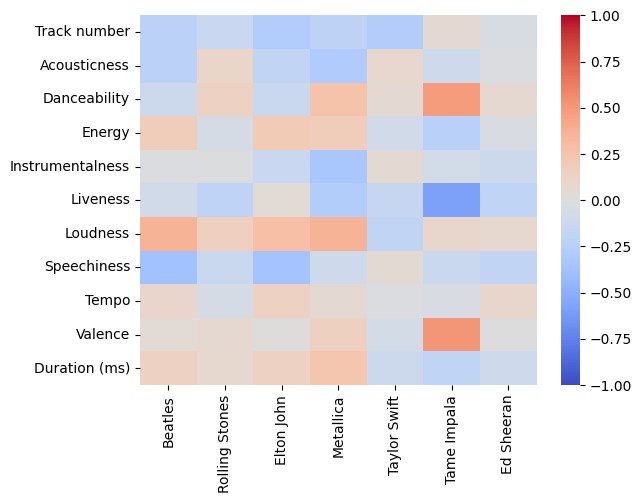

In [13]:
correlations_df = combine_correlation_matrices([beatles_df, rolling_stones_df, elton_john_df, metallica_df, taylor_swift_df, tame_impala_df, ed_sheeran_df], artists)
print_correlation_heatmap(correlations_df)
correlations_df.to_csv()

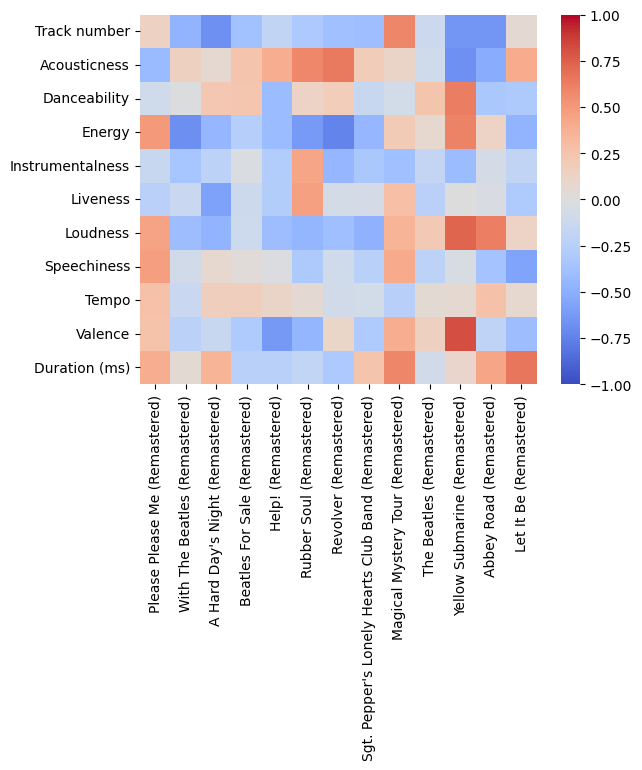

In [14]:
beatles_albums = get_correlation_matrix_by_album(beatles_df[(beatles_df['release_date'] <= '1980-01-01') & (~beatles_df['album'].str.contains('Deluxe'))])
print_correlation_heatmap(beatles_albums)

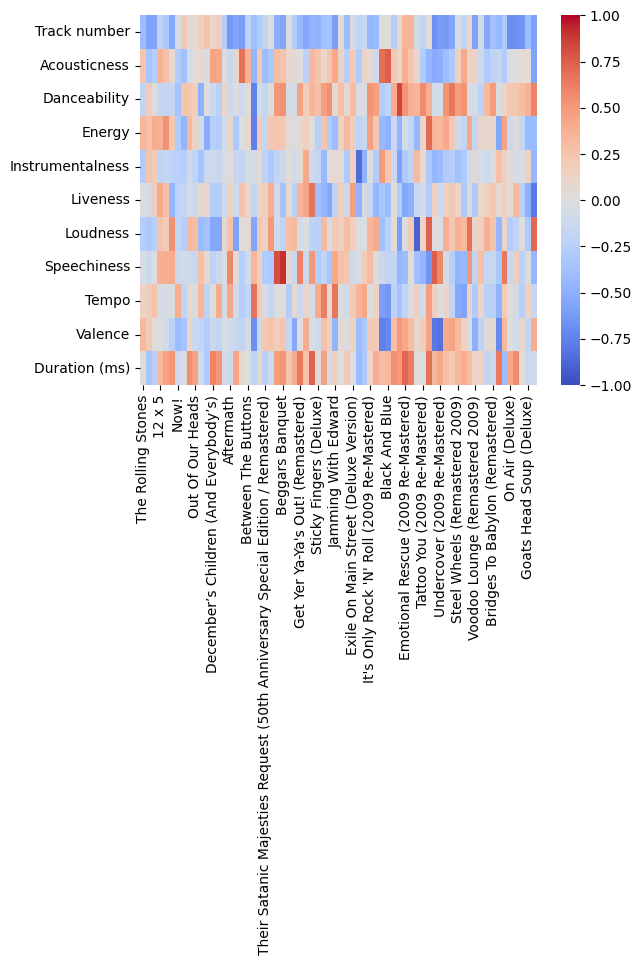

In [15]:
rolling_stones_albums = get_correlation_matrix_by_album(rolling_stones_df[~rolling_stones_df['album'].str.contains('Live')])
print_correlation_heatmap(rolling_stones_albums)

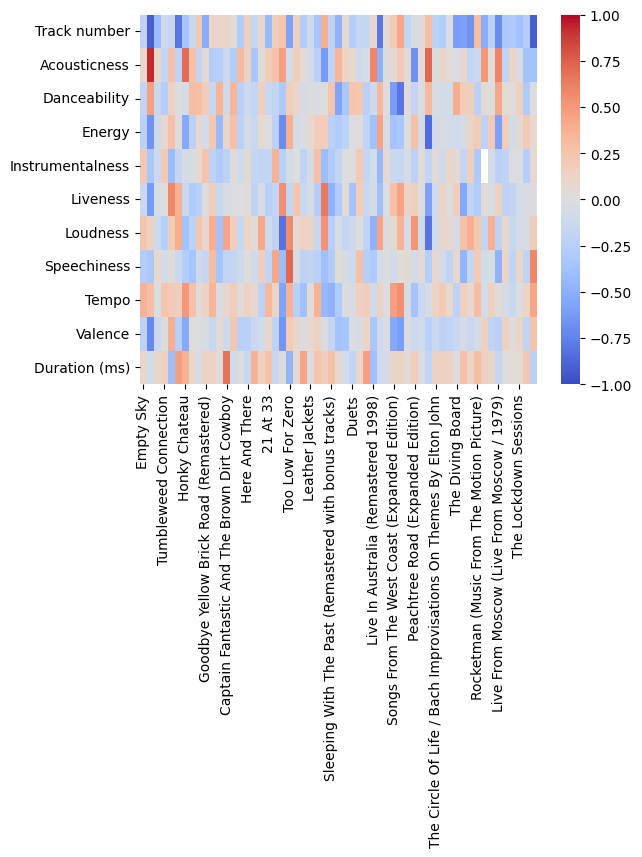

In [16]:
elton_john_albums = get_correlation_matrix_by_album(elton_john_df)
print_correlation_heatmap(elton_john_albums)

C:\Users\140775\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from current font.
  fig.canvas.draw()
C:\Users\140775\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.
  fig.canvas.draw()
C:\Users\140775\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 12532 (\N{KATAKANA LETTER VU}) missing from current font.
  fig.canvas.draw()
C:\Users\140775\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  fig.canvas.draw()
C:\Users\140775\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  fig.canvas.draw()
C:\Users\140775\AppData\Local\Programs\Py

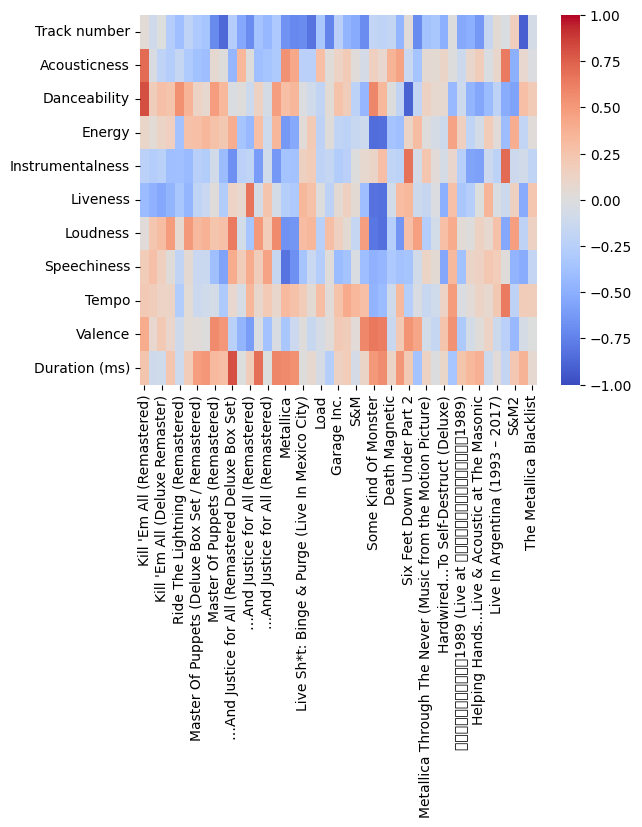

In [17]:
metallica_albums = get_correlation_matrix_by_album(metallica_df)
print_correlation_heatmap(metallica_albums)

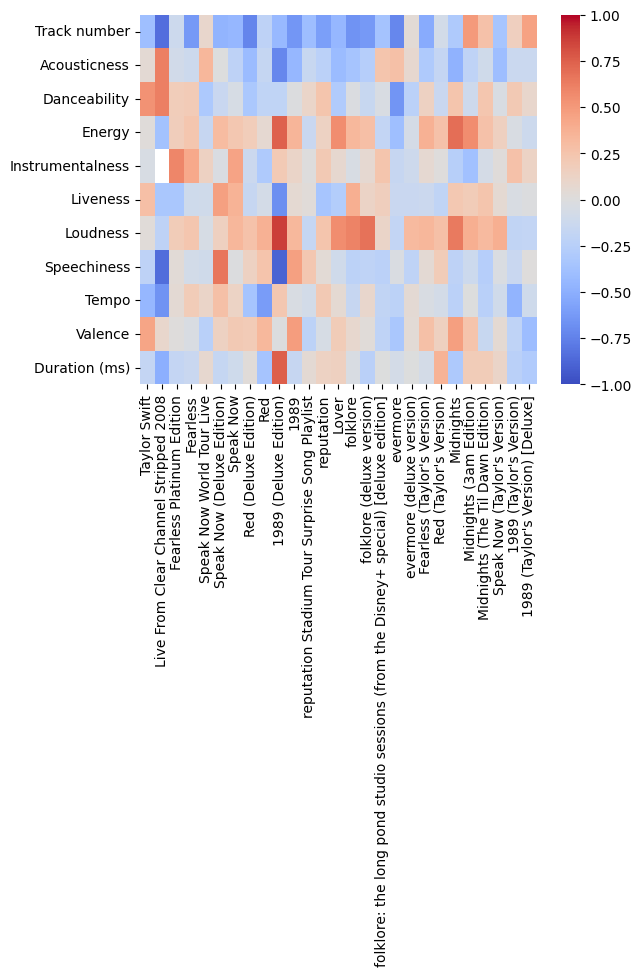

In [18]:
taylor_swift_albums = get_correlation_matrix_by_album(taylor_swift_df)
print_correlation_heatmap(taylor_swift_albums)

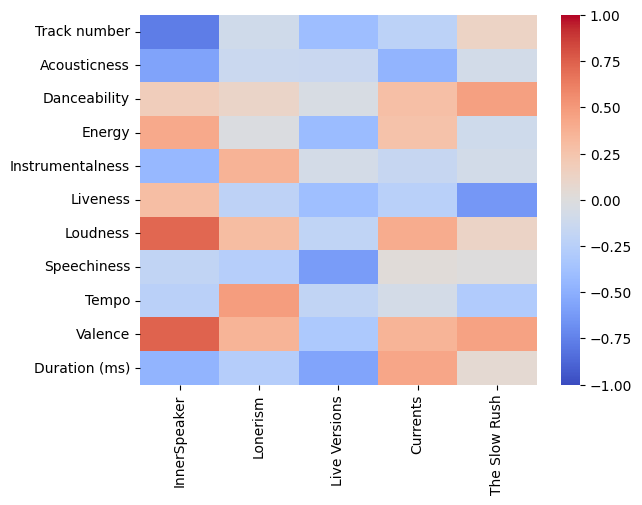

In [19]:
tame_impala_albums = get_correlation_matrix_by_album(tame_impala_df)
print_correlation_heatmap(tame_impala_albums)

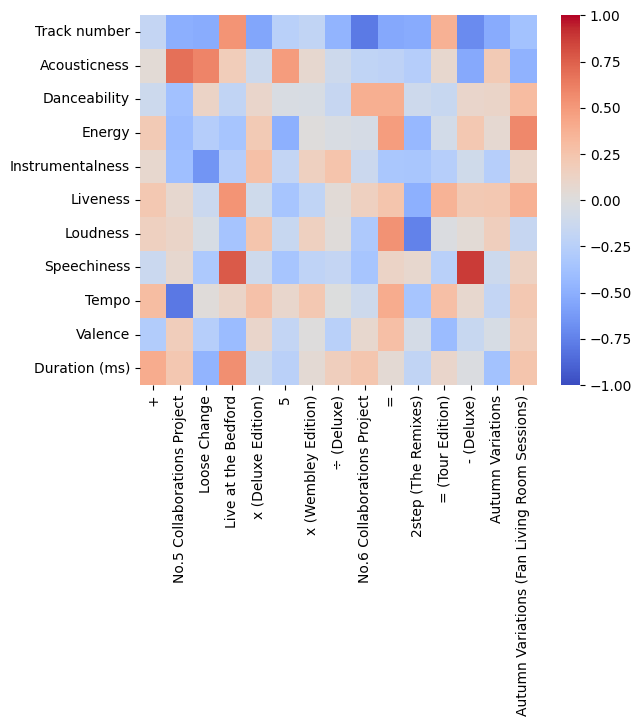

In [20]:
ed_sheeran_albums = get_correlation_matrix_by_album(ed_sheeran_df)
print_correlation_heatmap(ed_sheeran_albums)

## Testes com regressão linear

In [38]:
ed_sheeran_df['album_no_parenthesis'] = ed_sheeran_df['album'].apply(lambda x: re.sub("[\(\[].*?[\)\]]", "", x).strip())

<>:1: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\('
C:\Users\140775\AppData\Local\Temp\ipykernel_3220\909187843.py:1: SyntaxWarning: invalid escape sequence '\('
  ed_sheeran_df['album_no_parenthesis'] = ed_sheeran_df['album'].apply(lambda x: re.sub("[\(\[].*?[\)\]]", "", x).strip())


In [39]:
ed_sheeran_albums_list = [re.sub("[\(\[].*?[\)\]]", "", a).strip() for a in ed_sheeran_df['album'].unique()]
counter = dict(Counter(ed_sheeran_albums_list))

<>:1: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\('
C:\Users\140775\AppData\Local\Temp\ipykernel_3220\3235724218.py:1: SyntaxWarning: invalid escape sequence '\('
  ed_sheeran_albums_list = [re.sub("[\(\[].*?[\)\]]", "", a).strip() for a in ed_sheeran_df['album'].unique()]


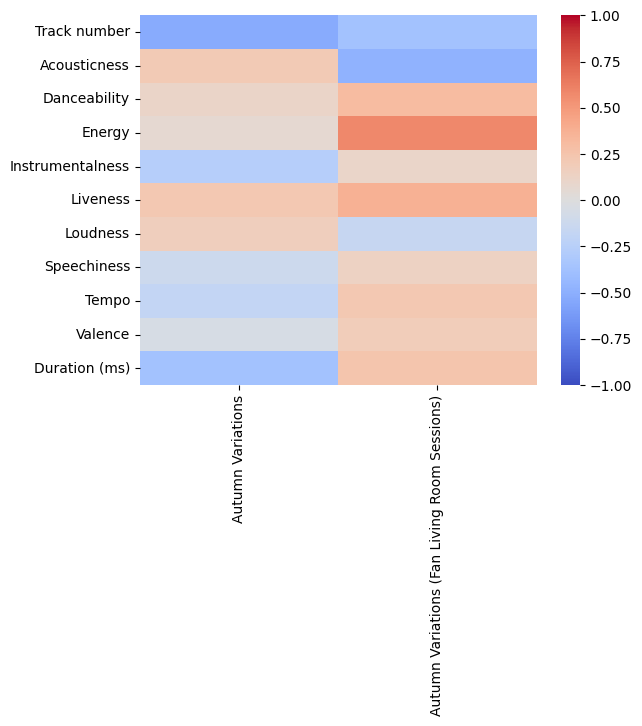

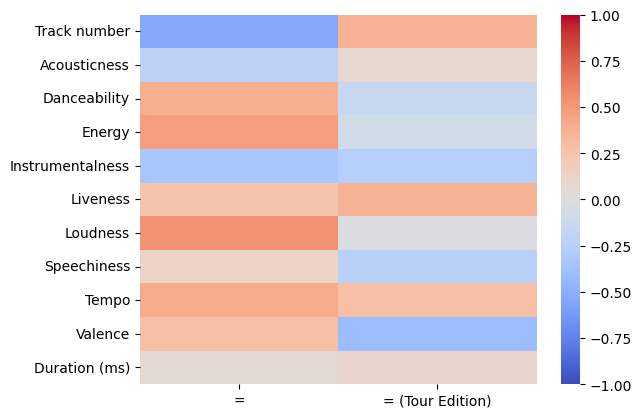

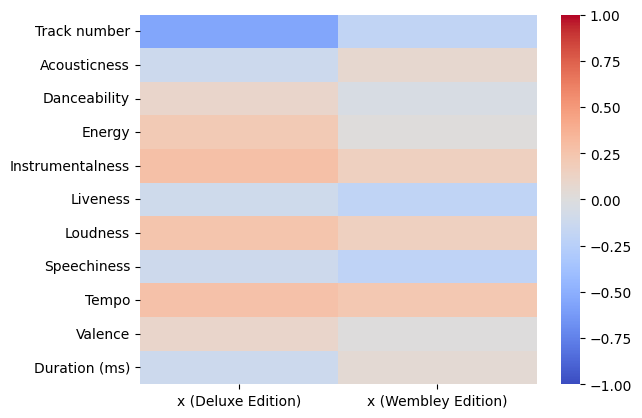

In [49]:
counter = {k: v for k, v in counter.items() if v > 1}
for album in counter.keys():
    albums_df = ed_sheeran_df[ed_sheeran_df['album_no_parenthesis'] == album]
    corrs = get_correlation_matrix_by_album(albums_df)
    print_correlation_heatmap(corrs)